In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9259259259259259, Loss: 0.3978138323183413
Checkpoint 200, Accuracy: 0.9135802469135802, Loss: 0.3607013843677662
Checkpoint 300, Accuracy: 0.9320987654320988, Loss: 0.3414560247350622
Checkpoint 400, Accuracy: 0.9506172839506173, Loss: 0.32259566695601855
Checkpoint 500, Accuracy: 0.9567901234567902, Loss: 0.3069814752649378


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.95200485 0.02226883 0.02572635]
[0. 1. 0.] <-> [0.42818516 0.557643   0.01417177]
[1. 0. 0.] <-> [0.89963895 0.0610998  0.03926124]
[1. 0. 0.] <-> [0.8547311  0.10256071 0.04270824]
[1. 0. 0.] <-> [0.8193018  0.16293077 0.01776746]
[1. 0. 0.] <-> [0.9360139  0.04134678 0.02263931]
[1. 0. 0.] <-> [0.92928404 0.03884505 0.03187087]
[1. 0. 0.] <-> [0.9231438  0.06167205 0.01518408]
[0. 1. 0.] <-> [0.4246921  0.5298856  0.04542226]
[0. 0. 1.] <-> [0.11254062 0.02623722 0.86122215]
[0. 1. 0.] <-> [0.47459713 0.5187189  0.00668399]
[0. 1. 0.] <-> [0.13170978 0.8612062  0.00708396]
[0. 1. 0.] <-> [0.13410302 0.85927397 0.00662303]
[1. 0. 0.] <-> [0.946404   0.0401737  0.01342233]
[1. 0. 0.] <-> [0.932141   0.04268222 0.0251768 ]
[1. 0. 0.] <-> [0.87981135 0.06546471 0.0547239 ]
[1. 0. 0.] <-> [0.71789813 0.27251348 0.00958839]
[1. 0. 0.] <-> [0.8261496  0.15989155 0.01395893]
[0. 0. 1.] <-> [0.6772402  0.02293696 0.2998228 ]
[1. 0. 0.] <-> [0.94997287 0.02204421 0.02798297]


In [12]:
# Testing Performance

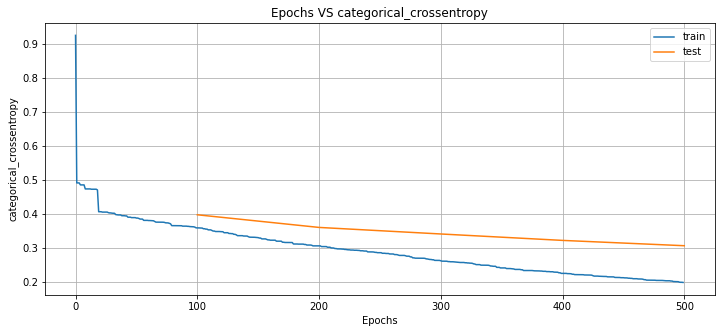

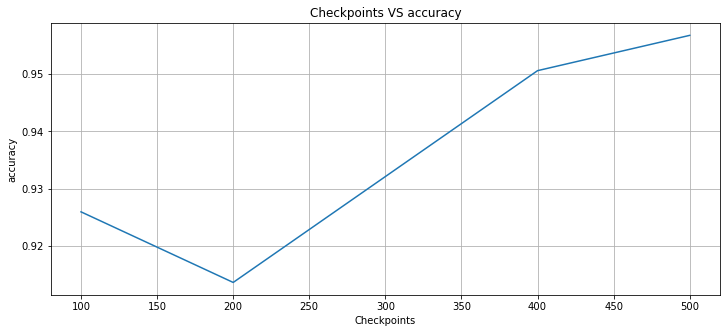

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9259259259259259, 'mean_square_error': 0.21365632790581676, 'categorical_crossentropy': 0.3978138323183413, 'precision': 0.8888888888888888, 'recall': 0.8888888888888888, 'f1': 0.8888888888888888, 'essential_metrics': {0: {'tp_hit': 75, 'fp_hit': 9, 'tn_hit': 21, 'fn_hit': 3}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 6}, 2: {'tp_hit': 11, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit': 3}}, 'checkpoint': 100} 


{'accuracy': 0.9135802469135802, 'mean_square_error': 0.19258958412588587, 'categorical_crossentropy': 0.3607013843677662, 'precision': 0.8703703703703703, 'recall': 0.8703703703703703, 'f1': 0.8703703703703703, 'essential_metrics': {0: {'tp_hit': 75, 'fp_hit': 11, 'tn_hit': 19, 'fn_hit': 3}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 6}, 2: {'tp_hit': 9, 'fp_hit': 3, 'tn_hit': 91, 'fn_hit': 5}}, 'checkpoint': 200} 


{'accuracy': 0.9320987654320988, 'mean_square_error': 0.17501394506059617, 'categorical_crossentropy': 0.3414560247350622, 'precisio

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[ 1.0475627  2.1209502 -1.1724541 -3.        -2.9734054]
 bias: 0.6807016134262085

Neuron 1: weights:
[-1.0214905   1.9849085   1.2289153  -2.4786143   0.42493296]
 bias: -1.690567135810852

Neuron 2: weights:
[ 2.5969703 -2.351886  -1.2543575 -2.3569882 -0.8674387]
 bias: -1.1117783784866333

Neuron 3: weights:
[-0.26159176  0.9993047   1.9139512   1.1272162   2.812592  ]
 bias: 0.6895027756690979

$
Layer 2
Neuron 0: weights:
[ 2.8584123 -1.3328837  1.7077717 -1.4420474]
 bias: 2.439091444015503

Neuron 1: weights:
[2.233379  2.6230159 1.7942194 0.604128 ]
 bias: -1.0754085779190063

Neuron 2: weights:
[-0.5122891 -2.6461244  2.7883096  1.9469615]
 bias: 0.7250040173530579

$

